<a href="https://colab.research.google.com/github/NamSugata/Aula_Python/blob/master/Exerc%C3%ADcios_aula10_cont_Pendulo%2C1%2C2%2C3%2C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### O pêndulo simples

No caso da **aceleração** assim como no caso do **pêndulo simples**, a equação diferencial é de segundo grau. 

Nesse caso é necessário na iteração resolver para $v$ e para $x$. 

A expressão para a aceleração pode ser uma função da posição, do tempo e também da velocidade, $a(v,x,t)$.

$ v(t_i)= v_{i} = v_{i-1} + a(v_{i-1},x_{i-1},t_{i-1}) * h $

e

$ x(t_i)= x_{i} = x_{i-1} + v_{i-1} *h $
<br>
<br>

A escolha do valor da velocidade pode ser:
* a velocidade no ponto anterior (**método de Euler**);
* a velocidade atualizada;
* uma média das duas (método do ponto médio). 

### Exercícios extras de resolução numérica de equações  diferenciais (da aula passada)

1. Imagine que tem um/a maratonista treinando, que num trecho de $5 km$ tem velocidade quase constante de $12 km/h$. Produza uma lista distância percorrida em intervalos de 1 minuto.

1. O/A mesmo/a atleta no seguinte trecho acelera por $200$ metros até chegar em $15 km/h$ por $2 km$. Queremos obter uma tabela ou gráfico da distância percorrida en função do tempo e o tempo total para chegar em $7 km$, faça isto utilizando listas.

1. Considere um pêndulo simples num plano. O comprimento da linha é $1$ metro, a massa é $0,2 kg$ e a aceleração de gravidade $9,8 m/s^2$. Faça um gráfico ou crie uma tabela para a posição em coordenadas cartesianas em função do tempo, utilizando listas.

1. Resolva o pêndulo simples com coordenadas polares (ao invés de coordenadas cartesianas).

- (opcional) Pesquise sobre o pacote numpy e os objetos desse pacote chamados array, tente utilizálos ao invés de listas para resolver os exercícios.

- (opcional) Pesquise sobre o pacote scipy e seu modulo integrate para resolver integrações ou equações diferenciais numéricamente.


In [ ]:
"Exercício 01:"
import math
import matplotlib.pyplot as plt

v=12

t=[i for i in range(0,26)]  #t0 = 0
y=[]
y.append(0)      #y_0 = 0

dt = t[1]-t[0] #sabemos que nesse caso o intervalo é 1 pela construção da lista t, mas é melhor colocar para ser geral

for i in range(1,len(t)) :
    yi = y[i-1]  + v/60 * dt
    y.append(yi)
print(y)

plt.plot(t,y)



In [ ]:
"Exercício 02:"
v=12
vf=15

t=[i for i in range(0,26)]  #t0 = 0
y=[]
y.append(0)      #y_0 = 0

tf=[i for i in range(0,10)]  #t0 = 0

dt = t[1]-t[0] #intervalo é 1 pela construção da lista t.

for i in range(1,len(t)) :
    yi = y[i-1]  + v/60 * dt 
    y.append(yi)
for i in range(1,len(tf)-1) :
    yi = yi + vf/60 * dt 
    y.append(yi)

print(y)


In [ ]:
"Exercício 03:"
def y2_prime(y2, y1, t):
  return y2 - 3*y1 + t

def y1_prime(y2):
  return y2

dt = 0.01
t = np.arange(0,4, dt)

y1_0 = 1           # condição de contorno
y1=[]
y1.append(y1_0)

y2_0 = -2          # condição de contorno
y2=[]
y2.append(y2_0)

for i in range(len(t)-1):
  #y1i = y1[i-1] + y1_prime(y2[i-1])*dt
  #y2i = y2[i-1] + y2_prime(y2[i-1], y1[i-1], t[i-1])*dt
  y1i = y1[i] + y1_prime(y2[i])*dt
  y2i = y2[i] + y2_prime(y2[i], y1[i], t[i])*dt

  y1.append(y1i)
  y2.append(y2i)

print(y1[-1])
print(y2[-1])

plt.plot(t, y1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Legend does not support 'n' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Legend does not support 'ã' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Legend does not support '-' instances.
A proxy artist may be used instead.
See: http://matp

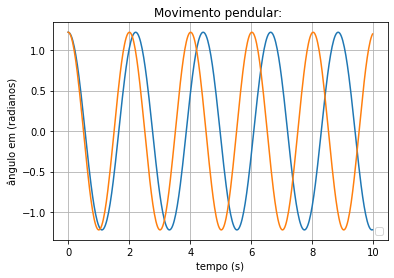

In [1]:
'Exercício 04:'
#importando os módulos
import numpy as np
from numpy import sin, cos
from scipy.integrate import odeint
from matplotlib import pyplot as plt

#definindo as equações
def equations(y0,t):
    theta, x = y0
    f = [x, -(g/l) * sin(theta)]
    return f

def plotar_resultados(tempo,theta1, theta2):
    plt.plot(tempo, theta1[:,0])
    plt.plot(tempo, theta2)

    plt.title('Movimento pendular: ')
    plt.xlabel('tempo (s)')
    plt.ylabel('ângulo em (radianos)')
    plt.grid(True)
    plt.legend('não-linear', 'linear', loc='lower right')
    plt.show()

#parâmetros
g = 9.8
l = 1.0
tempo = np.arange(0,10,0.025)

#condições iniciais
angulo_inicial = 70.0 #graus
theta0 = np.radians(angulo_inicial)
x0 = np.radians(0.0)

#encontrando as soluções possíveis
theta1 = odeint(equations,[theta0,x0], tempo) #não-linear
w = np.sqrt(g/l)
theta2 = [theta0 * cos(w*t)for t in tempo]

#plotar os resultados
plotar_resultados(tempo, theta1, theta2)

In [13]:
"teste:"
v = 20
a=1
def a(v,x,t):
    return v/t

def y2_prime(a,v,t):
    return v + a*v * dt

def y1_prime(y2,t):
    return y1 + (v * t)

dt = 0.01
t = np.arange(0,4, dt)

y1_0 = 1           # condição de contorno
y1=[]
y1.append(y1_0)

y2_0 = 20          # condição de contorno
y2=[]
y2.append(y2_0)

for i in range(len(t)-1):
  y1i = y1[i] + y1_prime(y2[i],t[i])*dt
  y2i = y2[i] + y2_prime(y2[i], y1[i], t[i])*dt

  y1.append(y1i)
  y2.append(y2i) 

ValueError: ignored